In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint as pp
import random

In [4]:
def plot_bar(df, x, y, title, x_label, y_label, isLog=False, rotate=False):
    plt.figure(figsize=(15,10))
    if isLog:
        df[y] = np.log(df[y])
        title = title + " (log scale)"
    if rotate:
        plt.barh(df[x], df[y])
        plt.xlabel(y_label)
        plt.ylabel(x_label)
    else:
        plt.bar(df[x], df[y])
        plt.xlabel(x_label)
        plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

def line_plot(df, x, y, title, x_label, y_label, isLog = False):
    plt.figure(figsize=(15, 10))
    if isLog:
        df[y] = np.log(df[y])
        title = title + " (log scale)"
    plt.plot(df[x], df[y])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

  ProductID StockCode                      Product_Details  Product_Count   
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER              6  \
1    536365     71053                  WHITE METAL LANTERN              6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER              8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE              6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.              6   

   Product_UnitPrice   Cus_ID Country  
0               2.55  17850.0   India  
1               3.39  17850.0   India  
2               2.75  17850.0   India  
3               3.39  17850.0   India  
4               3.39  17850.0   India  

Total missing values in dataframe:
ProductID                 0
StockCode                 0
Product_Details        1454
Product_Count             0
Product_UnitPrice         0
Cus_ID               135080
Country                   0
dtype: int64

Information about each column in dataframe:
<class 

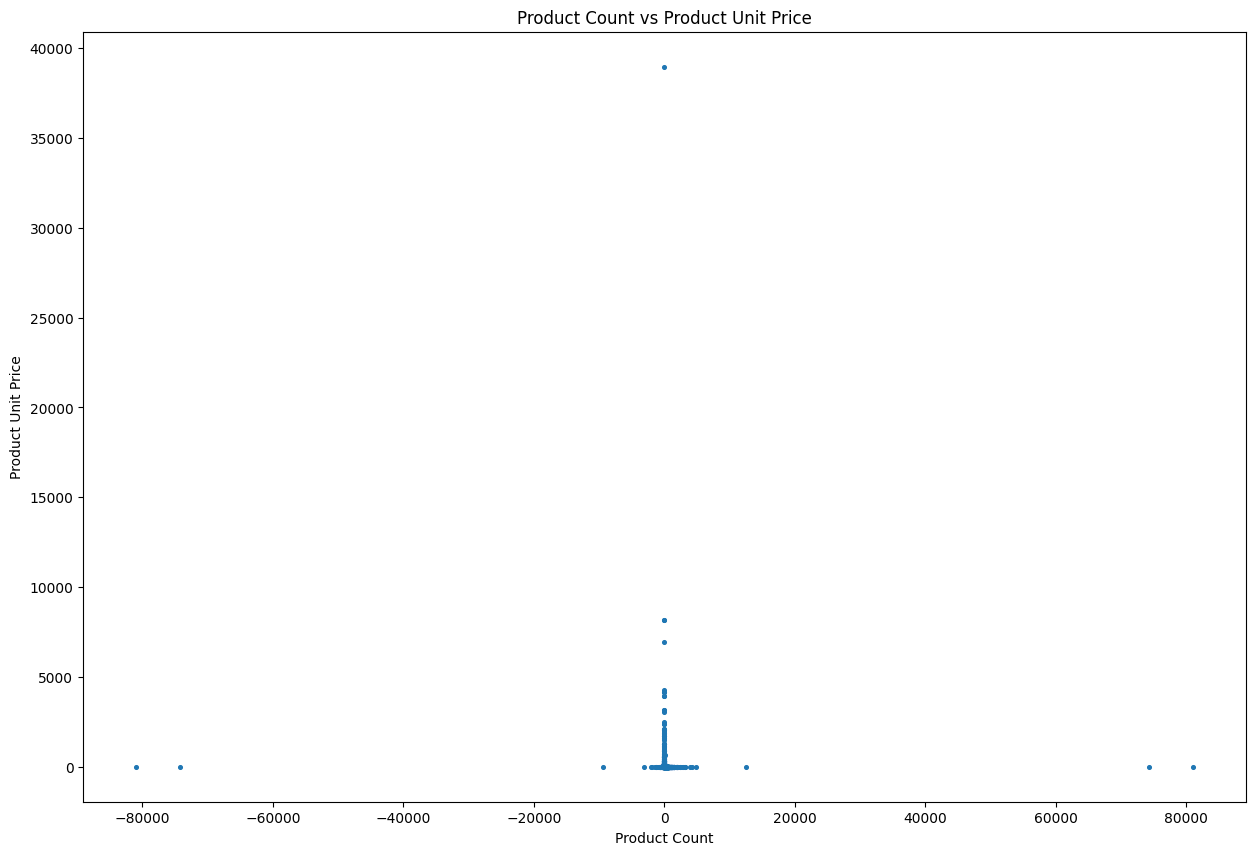

In [5]:
# Reading the Data
df = pd.read_csv('./Dataset/Ecommerce.csv', sep=",")
print(df.head())

df = df.dropna() # dropping NA values

# Missing Values and Handling them
print("\nTotal missing values in dataframe:")
print(df.isnull().sum())

# Dropping missing values
df.dropna(inplace=True)

# Information about each column
print("\nInformation about each column in dataframe:")
df.info()

X_ = df[['Product_Count', 'Product_UnitPrice']].values

# plot X
plt.figure(figsize=(15,10))
plt.scatter(X_[:, 0], X_[:, 1], s=7)
plt.xlabel('Product Count')
plt.ylabel('Product Unit Price')
plt.title('Product Count vs Product Unit Price')
plt.show()

In [6]:
# unique values in each column/ data type
columns = df.columns.values
for column in columns:
    if df[column].dtype == object:
        print("Feature: {}, Values: {}".format(column, df[column].unique()))
    else:
        print("Feature: {}, Data type: {}".format(column, df[column].dtype))

Feature: ProductID, Values: ['536365' '536366' '536367' ... '581585' '581586' '581587']
Feature: StockCode, Values: ['85123A' '71053' '84406B' ... '90214Z' '90089' '23843']
Feature: Product_Details, Values: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'PINK CRYSTAL SKULL PHONE CHARM'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
Feature: Product_Count, Data type: int64
Feature: Product_UnitPrice, Data type: float64
Feature: Cus_ID, Data type: float64
Feature: Country, Values: ['India' 'France' 'Australia' 'United Kingdom' 'Germany' 'Norway' 'EIRE'
 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium' 'Lithuania'
 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus' 'Sweden' 'Austria'
 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon' 'United Arab Emirates'
 'Saudi Arabia' 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Bahrain' 'Malta' 'RSA']


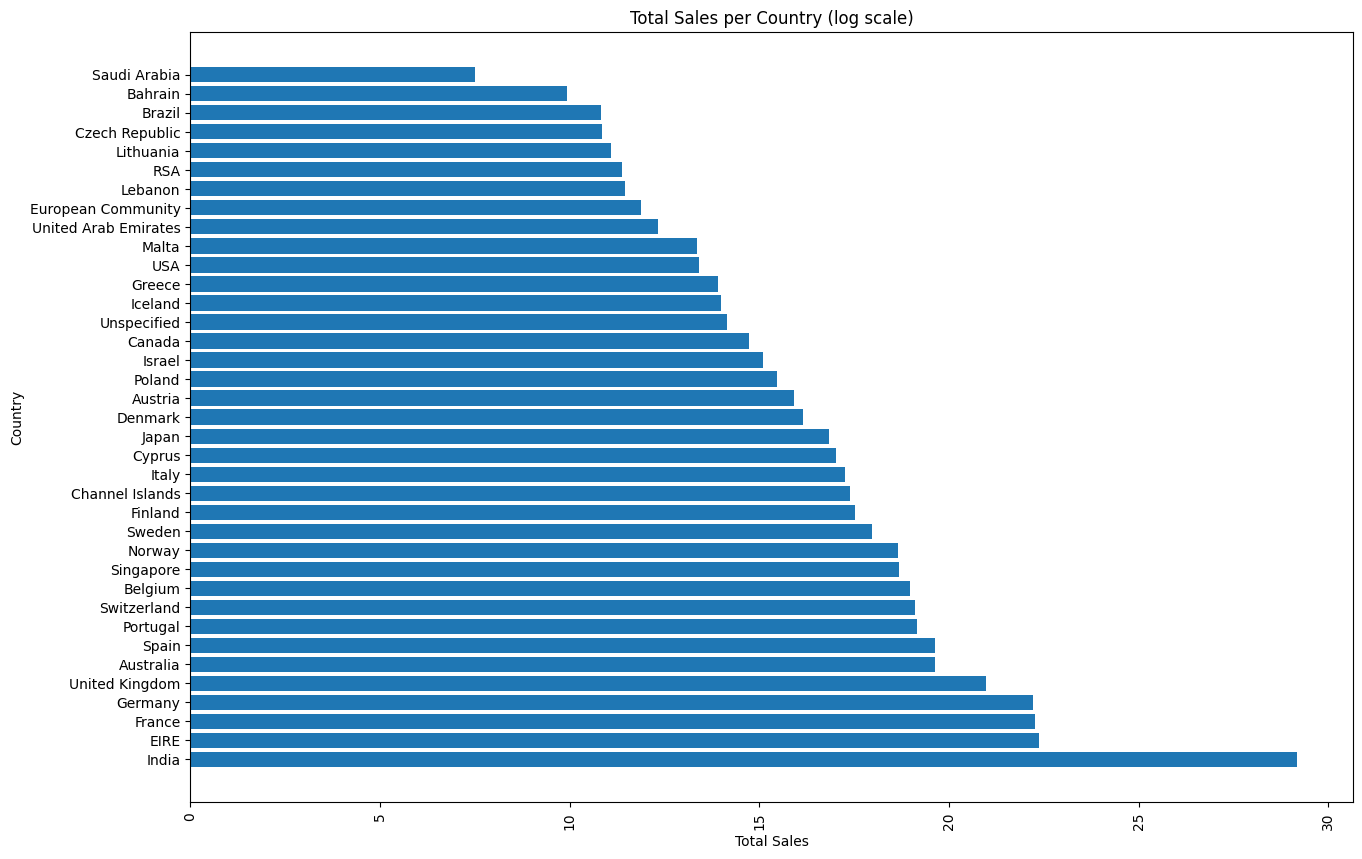

,Country,Product_Count,Product_UnitPrice,Total_Sales
17,India,4008533,1178277.264,4.723163e+12
10,EIRE,136329,38253.580,5.215072e+09
13,France,109848,42871.240,4.709320e+09
14,Germany,117448,37666.000,4.423796e+09
35,United Kingdom,200128,6492.550,1.299341e+09
0,Australia,83653,4054.750,3.391920e+08
30,Spain,26824,12633.450,3.388797e+08
26,Portugal,16044,12929.860,2.074467e+08
32,Switzerland,29778,6568.600,1.955998e+08
3,Belgium,23152,7540.130,1.745691e+08


In [50]:
#   Visualize the top countries by total sales.
def show_per_countries_sale(df):
   # use columns of Country and Product_Count,Product_UnitPrice
    country_sales = df.groupby('Country').agg({'Product_Count':'sum','Product_UnitPrice':'sum'}).reset_index()
    country_sales['Total_Sales'] = country_sales['Product_Count'] * country_sales['Product_UnitPrice']
    country_sales = country_sales.sort_values(by='Total_Sales',ascending=False)
    # PLOT
    plot_bar(country_sales.copy(), 'Country', 'Total_Sales', 'Total Sales per Country', 'Country', 'Total Sales', rotate=True, isLog=True)
    return country_sales


show_per_countries_sale(df)

In [10]:
# K-Means Clustering
class KMeansClustering():
    def __init__(self, X, num_clusters = 20, max_iterations = 100):
        self.K = num_clusters
        self.max_iterations = max_iterations
        self.centroids = None
        self.clusters = None
        self.num_datapoints = X.shape[0]
        self.num_features = X.shape[1]
        
    # randomly initialize centroids
    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero 
        for k in range(self.K): # iterations of 
            centroid = X[np.random.choice(range(self.num_datapoints))] # random centroids
            centroids[k] = centroid
        #print(centroids)
        return centroids # return random centroids
    
    # most matching cluster
    def most_matching_cluster(self, point, centroids):
        closest_centroid = np.argmin(np.sqrt(np.sum((centroids - point) ** 2, axis=1))) # calculate closest centroid
        return closest_centroid
    
    # create cluster Function
    def create_cluster(self, X, centroids):
        clusters = [[] for _ in range(self.K)]
        for point_idx, point in enumerate(X):
            closest_centroid = self.most_matching_cluster(point,centroids)
            # closest centroid using euclidian distance
            clusters[closest_centroid].append(point_idx)
        return clusters 

    # calculation of new centroids from the given cluster
    def calculate_new_centroids(self, clusters, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero
        for idx,clt in enumerate(clusters):
          clt_points = np.array(clt)
          if len(clt_points)==0:
            continue
          elements = np.array(X[clt_points])
          centroids[idx] = np.mean(elements,axis = 0)
        return centroids
    
    def loss_calculation(self, X):
        loss = 0
        for idx, cluster in enumerate(self.clusters):
            for point_idx in cluster:
                loss += np.sum((self.centroids[idx] - X[point_idx]) ** 2)
        return loss
        
    # fit data
    def fit(self, X):
        centroids = self.initialize_random_centroids(X) # initialize random centroids
        for _ in range(self.max_iterations):
            clusters = self.create_cluster(X, centroids) # create cluster
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X) # calculate new centroids
            diff = centroids - previous_centroids # calculate difference
            if not diff.any():
                break
        self.clusters = clusters
        self.centroids = centroids

    def visualize_clusters(self, X):
        plt.figure(figsize=(15,10))
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink']
        for idx, cluster in enumerate(self.clusters):
            cluster_points = X[cluster]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=7, c=colors[idx], label='Cluster {}'.format(idx))
            plt.scatter(self.centroids[idx, 0], self.centroids[idx, 1], s=200, c=colors[idx], marker='*', label='Centroids', edgecolors='black')
        plt.legend()
        title = 'K-Means Clustering' + '(k = ' + str(self.K) + ')'
        plt.xlabel('Product Count')
        plt.ylabel('Product Unit Price')
        plt.title(title)
        plt.show()

        

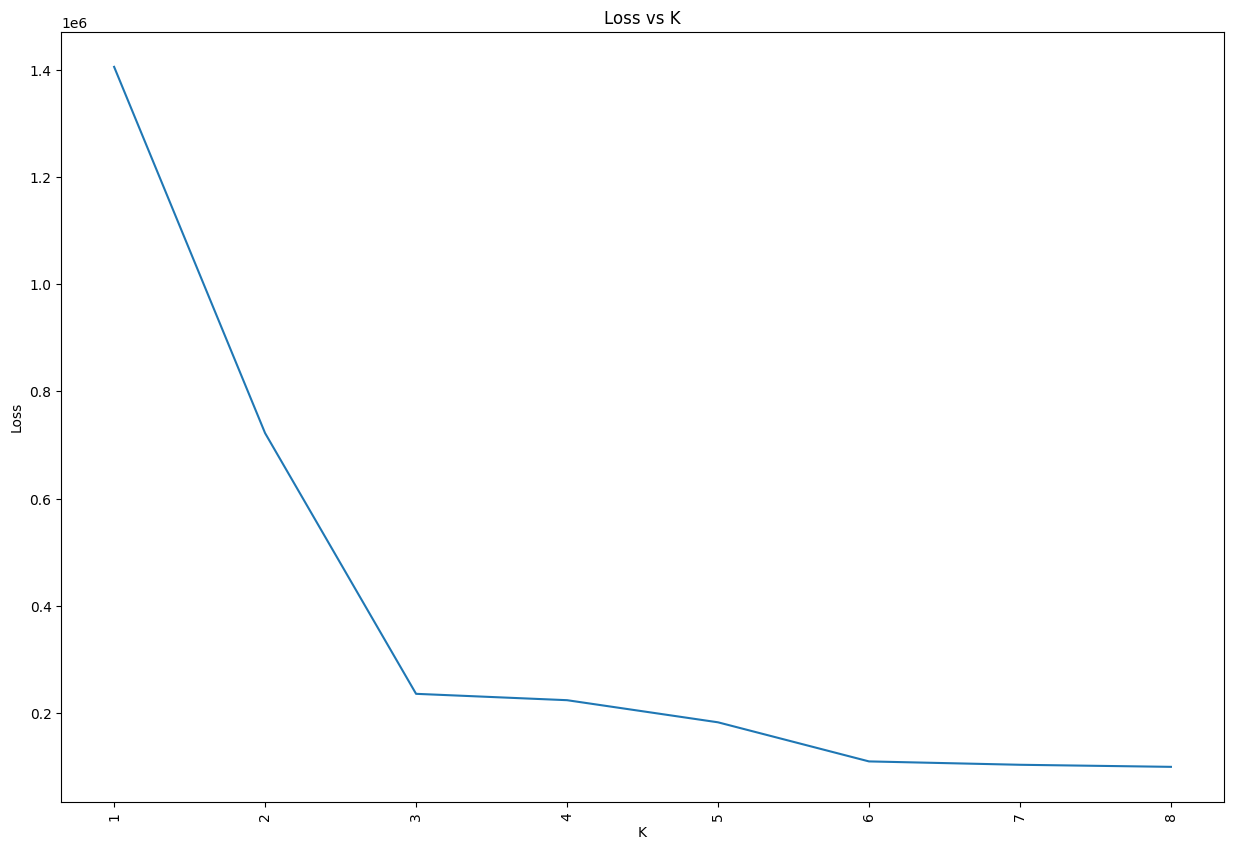

In [ ]:
# testing the kmeans clustering
def testing_Kmeans_Clustering(df):
    X = df[['Product_Count', 'Product_UnitPrice']].values
    Ks = [1, 2, 3, 4, 5, 6, 7, 8]
    loss = []
    for K in Ks:
        kmeans = KMeansClustering(X, num_clusters=K, max_iterations=100)
        kmeans.fit(X)
        # kmeans.visualize_clusters(X)
        loss.append(kmeans.loss_calculation(X))
    line_plot(pd.DataFrame({'K': Ks, 'Loss': loss}), 'K', 'Loss', 'Loss vs K', 'K', 'Loss')

df1 = df.copy()
testing_Kmeans_Clustering(df1)


- Above Plot between loss (sum of squared distance) and values of k, shows suddent change around 3, thus following elbow method, it is best to choose 3 as number of clusters.

Centroids:  [[126.67625899   1.31258993]
 [822.3          1.1625    ]
 [  8.05528969   4.01580157]]
Loss:  78064159.93701833


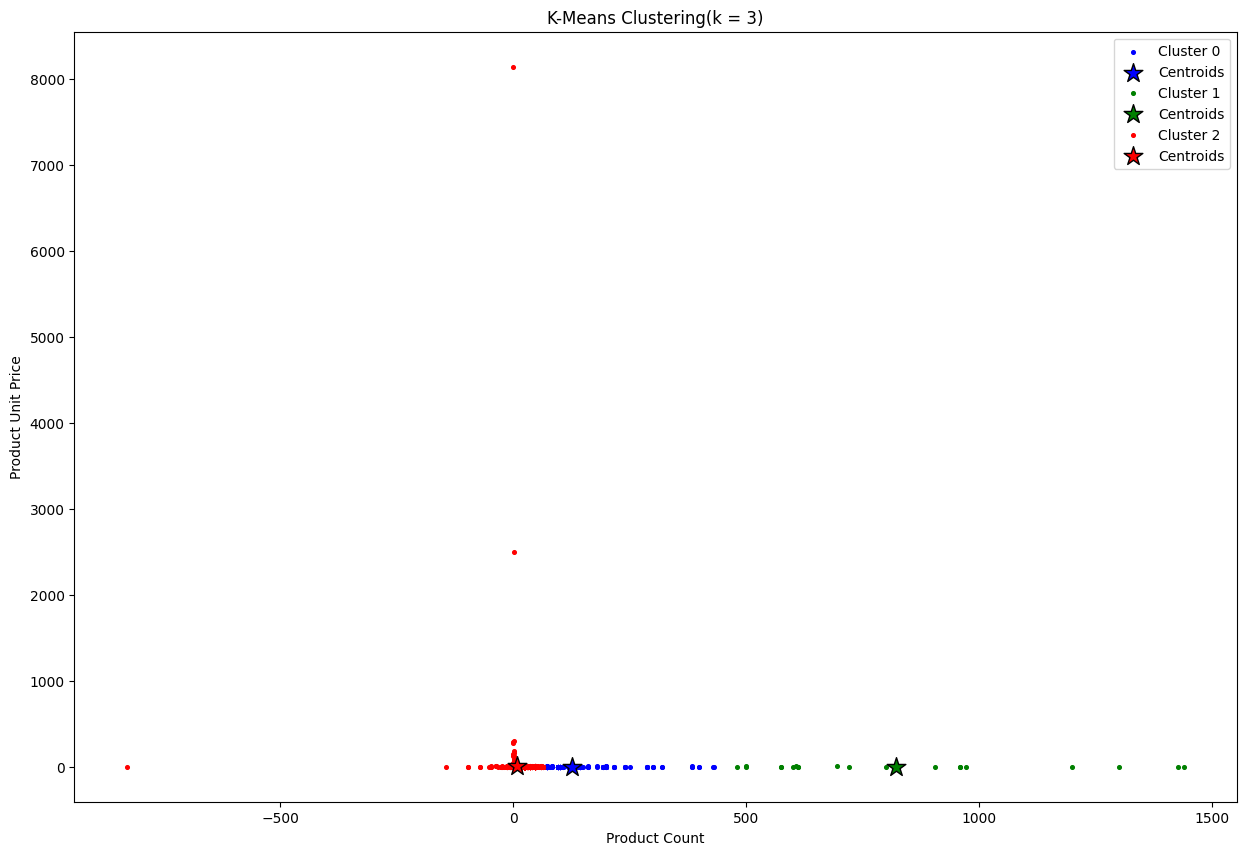

In [116]:
df1 = df.copy()
X = df1[['Product_Count', 'Product_UnitPrice']].values

kmeans = KMeansClustering(X, num_clusters=3, max_iterations=1000)
kmeans.fit(X)
print("Centroids: ", kmeans.centroids)
print("Loss: ", kmeans.loss_calculation(X))
kmeans.visualize_clusters(X)

* So, the above plot shows the clustering using kmeans algorithm. We can see that, the data is divided into 3 clusters. The clusters are well separated and the data points are well distributed in the clusters.
* Loss using mean squre is 78064159.93

In [113]:
# K Medoids Clustering
class KMedoids:
    def __init__(self, X, K, max_iterations=100):
        '''
        Initializing K-Medoids Clustering
        Args:
            X: numpy.ndarray
                Input data
            K: int
                Number of clusters
            max_iterations: int
                Maximum number of iterations
        '''
        self.K = K
        self.max_iterations = max_iterations
        self.num_datapoints = X.shape[0]
        self.num_features = X.shape[1]
        self.medoids = None
        self.clusters = None

    def initialize_random_medoids(self, X):
        '''
        Randomly initialize medoids
        Args:
            X: numpy.ndarray
                Input data
        Returns:
                numpy.ndarray
        '''
        medoids = np.zeros((self.K, self.num_features))
        for k in range(self.K):
            medoid = X[np.random.choice(range(self.num_datapoints))]
            medoids[k] = medoid
        return medoids
    
    def most_matching_medoid(self, point, medoids):
        '''
        Find the most matching medoid for a given point
        Args:
            point: numpy.ndarray
                Input data point
            medoids: numpy.ndarray
                Medoids
                
        Returns:
                int representing the closest medoid index
        '''
        closest_medoid = np.argmin(np.sqrt(np.sum((medoids - point) ** 2, axis=1)))
        return closest_medoid
    
    def create_cluster(self, X, medoids):
        '''
        Create clusters based on the medoids
        Args:
            X: numpy.ndarray
                Input data
            medoids: numpy.ndarray
                Medoids
                
        Returns:
                list of clusters'''
        clusters = [[] for _ in range(self.K)]
        for point_idx, point in enumerate(X):
            closest_medoid = self.most_matching_medoid(point, medoids)
            clusters[closest_medoid].append(point_idx)
        return clusters
    
    def calculate_new_medoids(self, clusters, X):
        '''
        Calculate new medoids based on the clusters
        Args:
            clusters: list
                List of clusters
            X: numpy.ndarray
                Input data
                
        Returns:
                numpy.ndarray: new medoids
        '''
        medoids = np.zeros((self.K, self.num_features))
        for idx, cluster in enumerate(clusters):
            cluster_points = np.array(cluster)
            if len(cluster_points) == 0:
                continue
            elements = np.array(X[cluster_points])
            distances = np.sum(np.abs(elements[:, None] - elements), axis=-1)
            total_distance = np.sum(distances, axis=1)
            medoid_idx = np.argmin(total_distance)
            medoids[idx] = elements[medoid_idx]
        return medoids
    
    def loss_calculation(self, X):
        '''
        Calculate the loss for the model
        Here the loss is summ of absolute differences between the medoids and the points in the cluster
        Args:
            X: numpy.ndarray
                Input data
        '''
        loss = 0
        for idx, cluster in enumerate(self.clusters):
            for point_idx in cluster:
                loss += np.sum(np.abs(self.medoids[idx] - X[point_idx]))
        return loss

    def fit(self, X):
        '''
        Fit the model
        Args:
            X: numpy.ndarray
                Input data
        '''
        medoids = self.initialize_random_medoids(X)
        for i in range(self.max_iterations):
            clusters = self.create_cluster(X, medoids)
            medoids = self.calculate_new_medoids(clusters, X)
            self.clusters = clusters
            self.medoids = medoids
            # if i%10 == 0:
            print("Iteration: ", i*10, " Loss: ", self.loss_calculation(X))

    def visualize_clusters(self, X):
        plt.figure(figsize=(15,10))
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink']
        for idx, cluster in enumerate(self.clusters):
            cluster_points = X[cluster]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=7, c=colors[idx], label='Cluster {}'.format(idx))
            plt.scatter(self.medoids[idx, 0], self.medoids[idx, 1], s=200, c=colors[idx], marker='*', label='Medoids', edgecolors='black')
        plt.legend()
        title = 'K-Medoids Clustering' + '(k = ' + str(self.K) + ')'
        plt.xlabel('Product Count')
        plt.ylabel('Product Unit Price')
        plt.title(title)
        plt.show()

Training for K:  1 

Iteration: 0, Loss: 99426245.21565388
Iteration: 10, Loss: 99426245.21565388
Iteration: 20, Loss: 99426245.21565388
Iteration: 30, Loss: 99426245.21565388
Iteration: 40, Loss: 99426245.21565388
Iteration: 50, Loss: 99426245.21565388
Iteration: 60, Loss: 99426245.21565388
Iteration: 70, Loss: 99426245.21565388
Iteration: 80, Loss: 99426245.21565388
Iteration: 90, Loss: 99426245.21565388
Training for K:  2 

Iteration: 0, Loss: 80963993.81541699
Iteration: 10, Loss: 80963993.81541699
Iteration: 20, Loss: 80963993.81541705
Iteration: 30, Loss: 80963993.81541699
Iteration: 40, Loss: 80963993.81541699
Iteration: 50, Loss: 80963993.81541705
Iteration: 60, Loss: 80963993.81541699
Iteration: 70, Loss: 80963993.81541699
Iteration: 80, Loss: 80963993.81541699
Iteration: 90, Loss: 80963993.81541699
Training for K:  3 

Iteration: 0, Loss: 17633380.920269206
Iteration: 10, Loss: 79034481.66286372
Iteration: 20, Loss: 79034481.66286357
Iteration: 30, Loss: 79034481.66286357
Ite

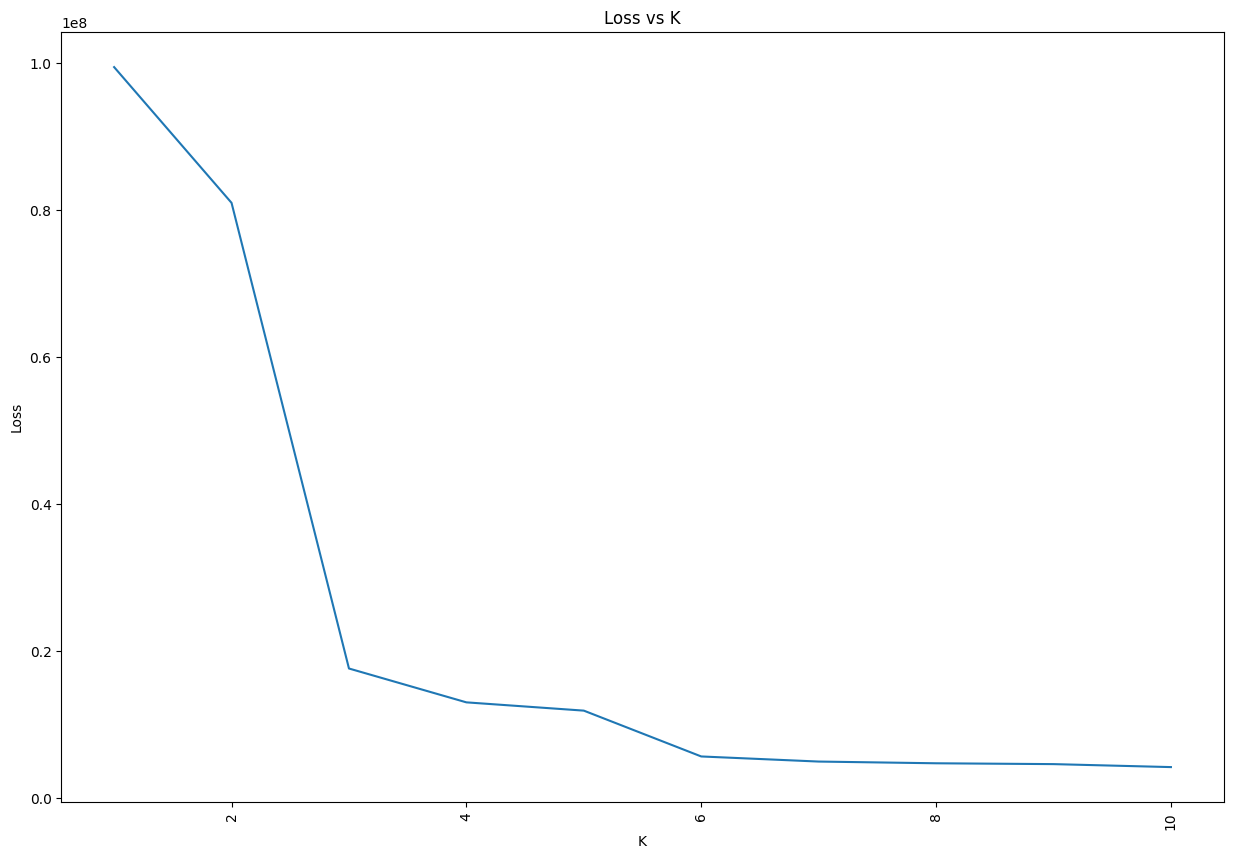

In [63]:
# testing the kmeans clustering
def testing_kmedoids_Clustering(df):
    X = df[['Product_Count', 'Product_UnitPrice']].values
    Ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    loss = []
    for K in Ks:
        print("Training for K: ", K, "\n")
        # K-Medoids Clustering for K clusters
        kmedoids = KMedoids(X, num_clusters=K, max_iterations=100)
        kmedoids.fit(X)
        # kmedoids.visualize_clusters(X)
        loss.append(kmedoids.loss_calculation(final=True))
    line_plot(pd.DataFrame({'K': Ks, 'Loss': loss}), 'K', 'Loss', 'Loss vs K', 'K', 'Loss')

df1 = df.copy()
testing_kmedoids_Clustering(df1)

* Here also, we can see an elbow at k=3, thus we can choose k=3 as number of clusters in K Medoids clustering also.

Iteration:  0  Loss:  124276.60000000127
Iteration:  10  Loss:  123172.94000000026
Iteration:  20  Loss:  123172.94000000026
Iteration:  30  Loss:  123172.94000000026
Iteration:  40  Loss:  123172.94000000026
Iteration:  50  Loss:  123172.94000000026
Iteration:  60  Loss:  123172.94000000026
Iteration:  70  Loss:  123172.94000000026
Iteration:  80  Loss:  123172.94000000026
Iteration:  90  Loss:  123172.94000000026


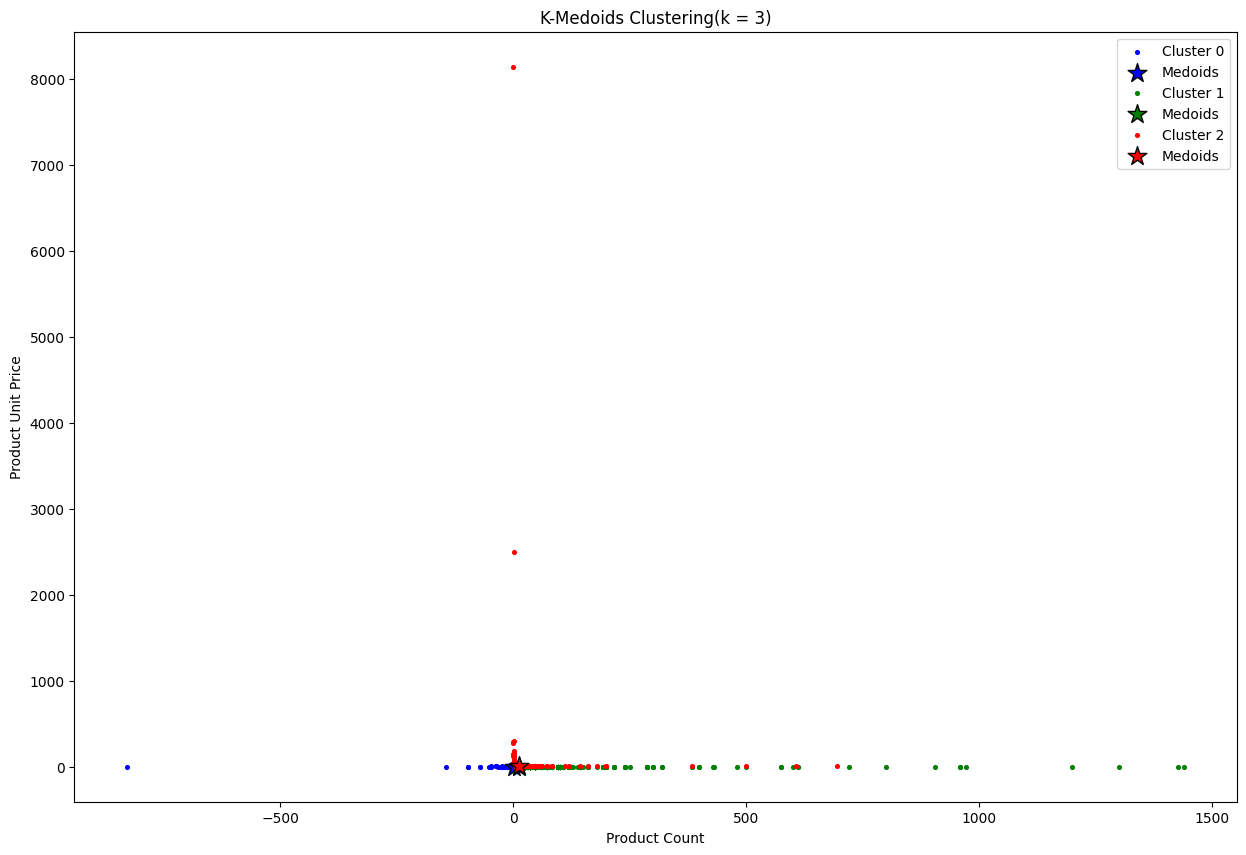

Centroids:  [[ 2.    2.55]
 [12.    1.25]
 [12.    4.15]]
Loss:  123172.94000000026
Clusters:  [[0, 1, 3, 4, 6, 7, 10, 11, 12, 14, 16, 17, 20, 21, 24, 25, 26, 27, 28, 29, 31, 32, 33, 36, 42, 44, 49, 50, 51, 53, 54, 58, 60, 62, 63, 65, 67, 70, 72, 75, 76, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 96, 100, 103, 104, 105, 106, 107, 111, 114, 115, 116, 118, 119, 120, 122, 123, 124, 125, 126, 127, 129, 131, 133, 135, 136, 138, 140, 141, 142, 149, 150, 151, 153, 154, 155, 156, 157, 161, 162, 163, 164, 165, 169, 170, 171, 173, 174, 175, 176, 177, 178, 180, 183, 185, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 199, 200, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 215, 216, 217, 221, 222, 223, 224, 226, 228, 229, 230, 235, 240, 241, 242, 243, 244, 246, 248, 250, 252, 253, 254, 255, 256, 258, 259, 261, 263, 264, 266, 267, 268, 270, 271, 272, 274, 275, 276, 277, 278, 280, 281, 282, 283, 288, 291, 293, 295, 298, 299, 300, 301, 302, 304, 306, 307, 309, 310, 311, 313, 3

In [115]:
# Analyzing of the chosen K Medoids Cluster (k = 3)
df_ = df.copy()
X = df_[['Product_Count', 'Product_UnitPrice']].values
# K-Medoids Clustering for K clusters
model = KMedoids(X, K=3, max_iterations=100)
model.fit(X)
model.visualize_clusters(X)

print("Centroids: ", model.medoids)
print("Loss: ", model.loss_calculation(X))
print("Clusters: ", model.clusters)

* The above plot shows the clustering using K Medoids algorithm. We can see that, the data is divided into 3 clusters.

#### Comparison wrt K-Means and K-Medoids
* For both K-Means and K-Medoids, we can see that the data is divided into 3 clusters.
* For K-Means, clusters are distributed whereas in k-medoids, they are closeby.
* Loss in k-means is 78064159.93( using sum of square distances) and in k-medoids is 123172 (using sum of absolute distance)

In [19]:
############### DBSCAN Clustering ################

class Point:
    '''
    Class to represent a point in the dataset
    '''
    def __init__(self, x, y):
        '''
        Initialize the point
        Args:
            x: float
                x-coordinate of the point
            y: float
                y-coordinate of the point
        '''
        self.x = x
        self.y = y
        self.cluster_id = None
        self.visited = False

class DBSCAN:
    '''
    DBSCAN Clustering
    '''
    def __init__(self, epsilon, minPts):
        '''
        Initialize the DBSCAN Clustering
        Args:
            epsilon: float
                Radius of the neighborhood
            minPts: int
                Minimum number of points in the neighborhood
        '''
        self.epsilon = epsilon
        self.minPts = minPts
        self.clusters = []

    def fit(self, data):
        '''
        Fit the model
        Args:
            data: list of list
                Input data
        '''
        data = [Point(x[0], x[1]) for x in data]
        self.clusters = []
        l = 0
        for point in data:
            l += 1
            if not point.visited:
                point.visited = True
                neighbors = self.region_query(data, point)
                if len(neighbors) < self.minPts:
                    point.cluster_id = -1  # Noise
                else:
                    cluster_id = len(self.clusters)
                    self.expand_cluster(data, point, neighbors, cluster_id)

    def expand_cluster(self, data, point, neighbors, cluster_id):
        '''
        Expand the cluster
        Args:
            data: list of list
                Input data
            point: Point
                Point to expand
            neighbors: list
                List of neighbors
            cluster_id: int
                Cluster ID
        '''
        cluster = []
        cluster.append(point)
        point.cluster_id = cluster_id

        i = 0
        while i < len(neighbors):
            neighbor = neighbors[i]
            if not neighbor.visited:
                neighbor.visited = True
                new_neighbors = self.region_query(data, neighbor)
                if len(new_neighbors) >= self.minPts:
                    neighbors.extend(new_neighbors)
            if neighbor.cluster_id is None:
                cluster.append(neighbor)
                neighbor.cluster_id = cluster_id
            i += 1

        self.clusters.append(cluster)

    def region_query(self, data, point):
        '''
        Find the neighbors of a point
        Args:
            data: list of list
                Input data
            point: Point
                Point to find neighbors
        Returns:
            list
                List of neighbors
        '''
        neighbors = []
        for other_point in data:
            if self.distance(point, other_point) <= self.epsilon:
                neighbors.append(other_point)
        return neighbors

    def distance(self, point1, point2):
        '''
        Calculate the distance between two points
        Args:
            point1: Point
                Point 1
            point2: Point
                Point 2
        Returns:
            float
                Distance between two points
        '''
        return np.sqrt((point1.x - point2.x) ** 2 + (point1.y - point2.y) ** 2)

    def visualize_clusters(self):
        '''
        Visualize the clusters
        '''
        plt.figure(figsize=(15,10))
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink']
        for idx, cluster in enumerate(self.clusters):
            cluster_points = np.array([[point.x, point.y] for point in cluster])
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=7, c=colors[idx], label='Cluster {}'.format(idx))
        plt.legend()
        title = 'DBSCAN Clustering' + '(epsilon = ' + str(self.epsilon) + ', minPts = ' + str(self.minPts) + ')'
        plt.xlabel('Product Count')
        plt.ylabel('Product Unit Price')
        plt.title(title)
        plt.show()

    def loss_calculation(self):
        '''
        Calculate the loss for the model
        Here, the loss is the sum of the distances between the points and the centroid of the cluster
        '''
        loss = 0
        for cluster in self.clusters:
            for point in cluster:
                loss += self.distance(point, cluster[0])
        return loss

Training for Epsilon 1
Number of clusters:  30  Loss: 56023.199771840154

Training for Epsilon 3
Number of clusters:  17  Loss: 83697.07229676591

Training for Epsilon 5
Number of clusters:  13  Loss: 101449.96566776707

Training for Epsilon 7
Number of clusters:  11  Loss: 101973.87780272748

Training for Epsilon 9
Number of clusters:  6  Loss: 107040.70385556435

Training for Epsilon 11
Number of clusters:  6  Loss: 107264.29530174633

Training for Epsilon 13
Number of clusters:  4  Loss: 125195.30546386543

Training for Epsilon 15
Number of clusters:  4  Loss: 125259.05546386552

Training for Epsilon 17
Number of clusters:  5  Loss: 125403.53962136114

Training for Epsilon 19
Number of clusters:  5  Loss: 125403.53962136101

Training for Epsilon 21
Number of clusters:  4  Loss: 130056.49504357856



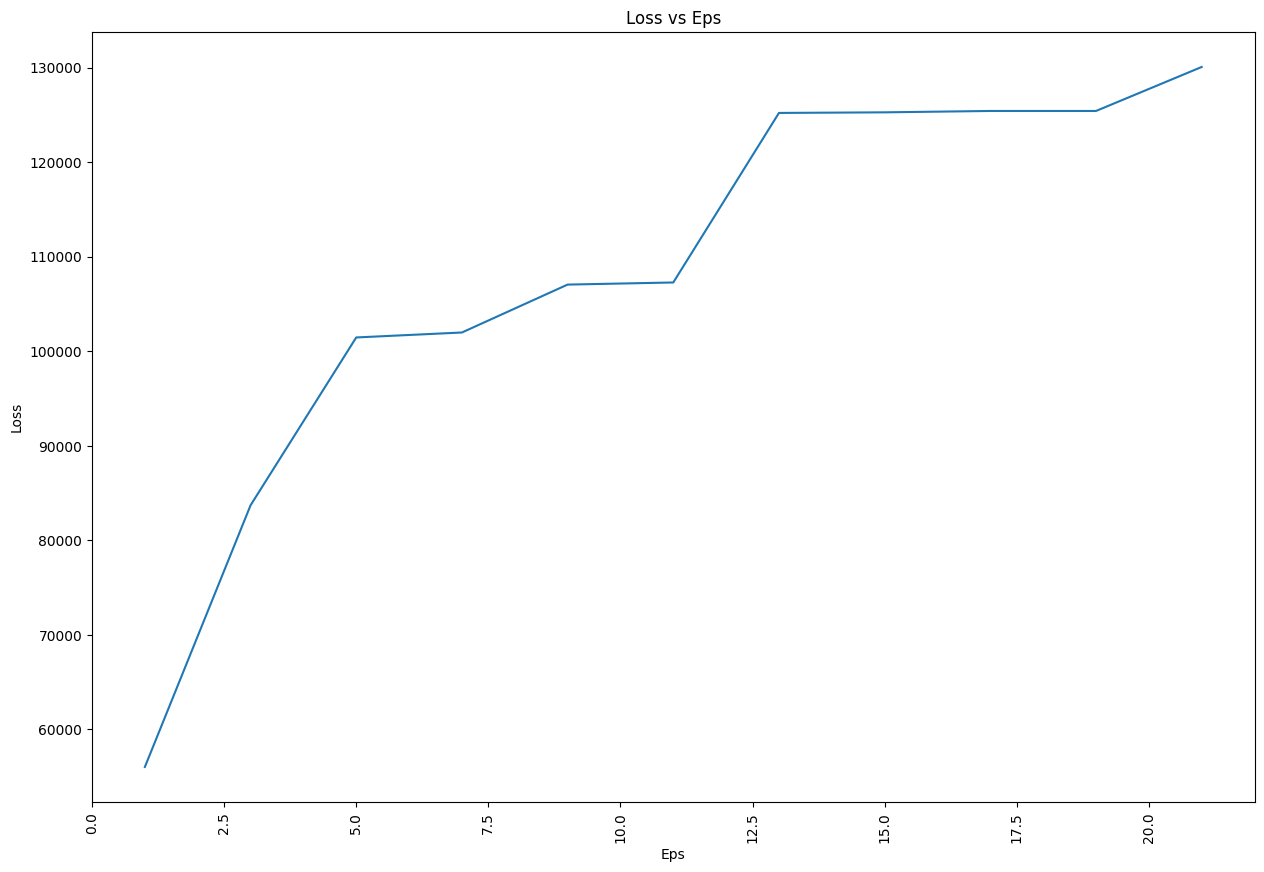

In [25]:
# testing the dbscan clustering
def testing_dbscan_clustering(df):
    X = df[['Product_Count', 'Product_UnitPrice']].values
    eps_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
    min_samples = 5
    loss = []
    clusters = []
    for eps in eps_values:
        print("Training for Epsilon", eps)
        dbscan = DBSCAN(epsilon=eps, minPts=min_samples)
        dbscan.fit(X)
        loss.append(dbscan.loss_calculation())
        clusters.append(len(dbscan.clusters))
        print("Number of clusters: ", len(dbscan.clusters), " Loss:", loss[-1])
        print()
        # dbscan.visualize_clusters()
    line_plot(pd.DataFrame({'Eps': eps_values, 'Loss': loss}), 'Eps', 'Loss', 'Loss vs Eps', 'Eps', 'Loss')
    return eps_values, loss, clusters

df1 = df.copy()
eps, loss, clusters = testing_dbscan_clustering(df1)

* Above plot show the Loss vs different Eps values for DBSCAN. We can see that, as the value of the epsilon increases the loss also increases. One of the reason behind this is lesser number of clusters are formed as the epsilon value increases.
* Increaseing epsilon, encourage more points to be included in the clusters, thus the noise points also gets included. 

In [39]:
data = {
    'epsilon': eps,
    'clusters': clusters,
    'loss': loss
}

# Create DataFrame
result_df = pd.DataFrame(data)
result_df

,epsilon,clusters,loss
0,1,30,56023.199772
1,3,17,83697.072297
2,5,13,101449.965668
3,7,11,101973.877803
4,9,6,107040.703856
5,11,6,107264.295302
6,13,4,125195.305464
7,15,4,125259.055464
8,17,5,125403.539621
9,19,5,125403.539621


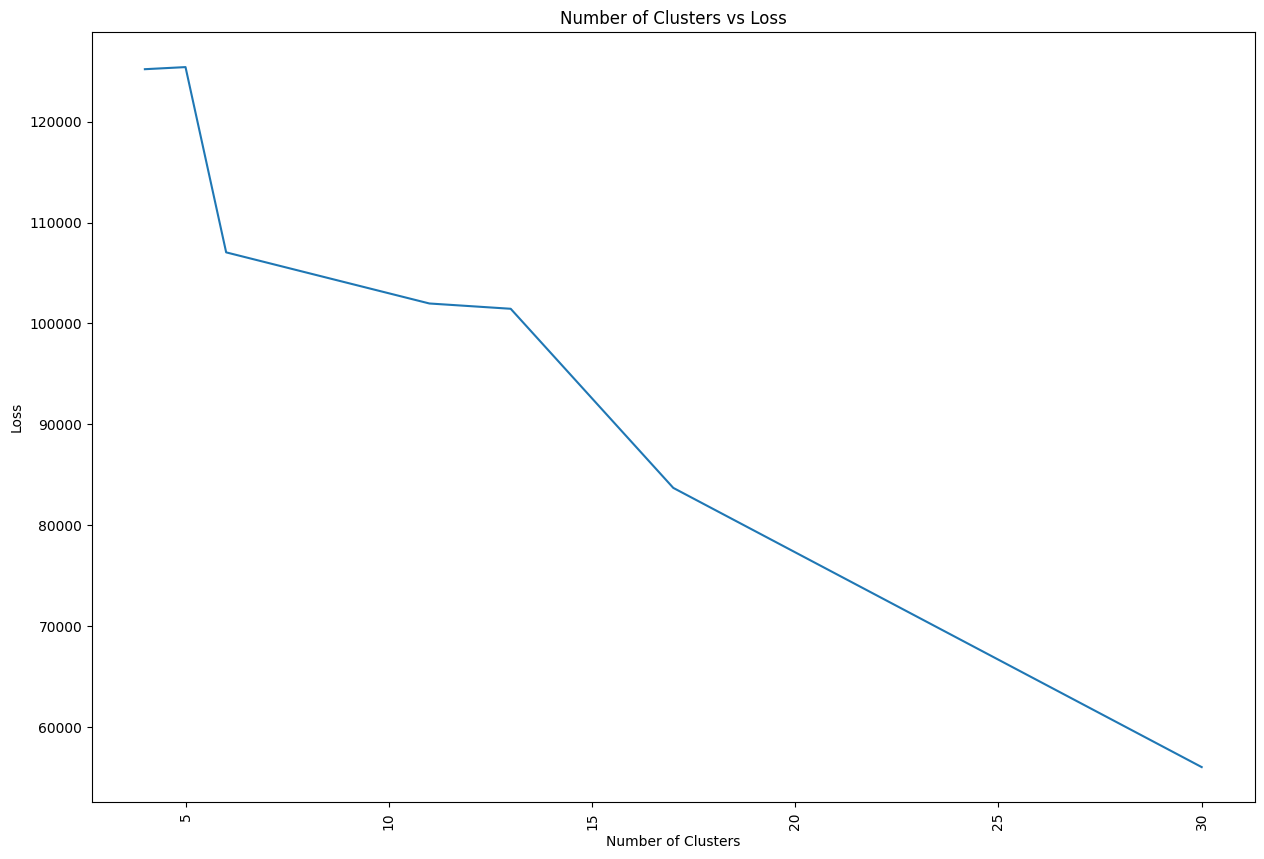

In [43]:
# sort wrt clusters
result_df = result_df.sort_values(by='clusters')
# make line plot of number of clusters vs loss
line_plot(result_df, 'clusters', 'loss', 'Number of Clusters vs Loss', 'Number of Clusters', 'Loss')

* So, in this case there is not a perfect elbow, but we can see that the loss is decreasing with increasing number of clusters, thus we can choose k=11 as number of clusters.

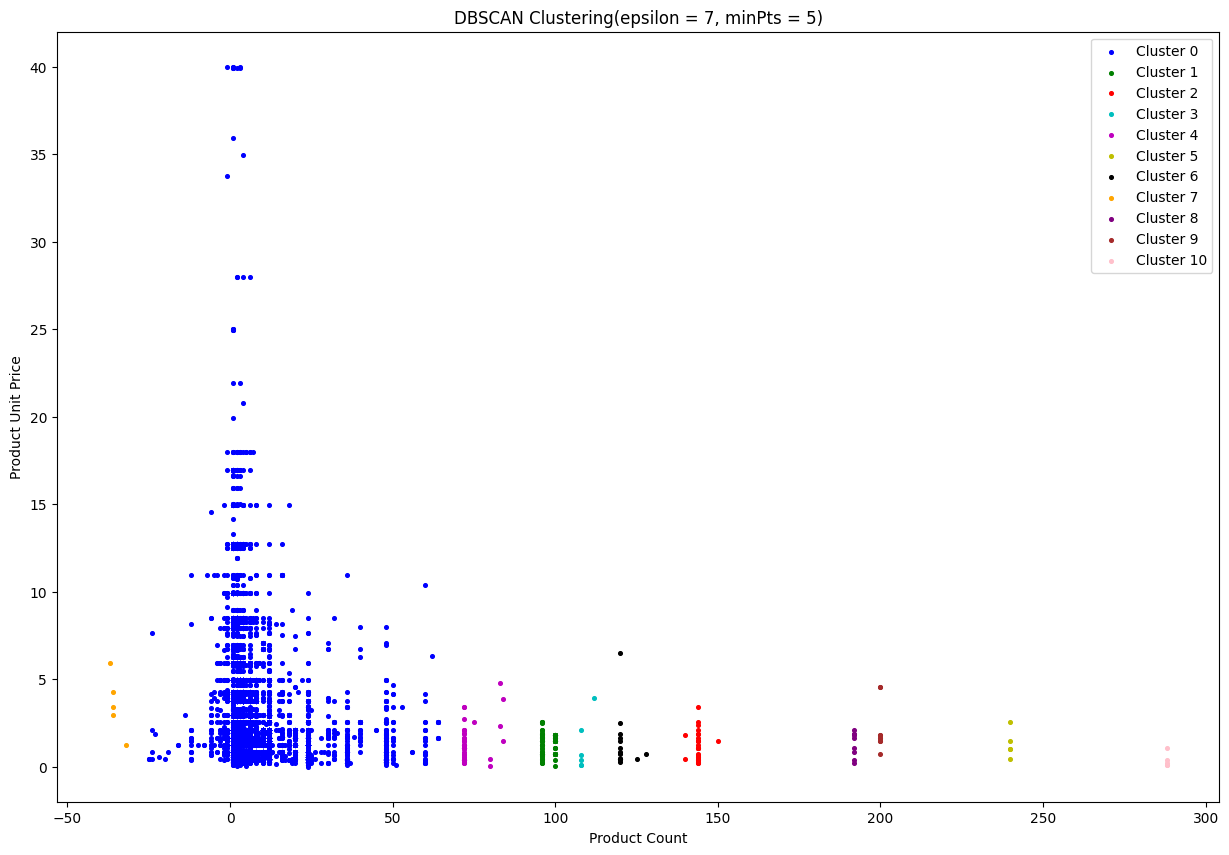

Loss:  101973.87780272748
Number of clusters:  11


In [44]:
# Training for k=11, which we got at epsilon=7
df1 = df.sample(60000, random_state=43)
X = df1[['Product_Count', 'Product_UnitPrice']].values
dbscan = DBSCAN(epsilon=7, minPts=5)
dbscan.fit(X)
dbscan.visualize_clusters()
print("Loss: ", dbscan.loss_calculation())
print("Number of clusters: ", len(dbscan.clusters))

* Thus we can see that the clustering for k = 11, which we got at epsilon = 7 shows distinct clusters and the data points are well distributed in the clusters.
* Loss in this model is 101973.877 (using sum of absolute distance)

* Note in this part, I have sampled the data points to reduce the computational complexity. (Memory requirement was getting higher)

Comparing with K-Means or K-Medoids, we can say that DBSCAN is more robust to the noise, as it handles that. Also, DBSCAN is more flexible in terms of shape of the clusters, as it can handle non-linear shapes also. But, K-Means and K-Medoids are more sensitive to the outliers and noise.